In [48]:
import pandas as pd
import numpy as np
from sklearn.calibration import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
df = pd.read_csv("Crop_recommendation.csv")
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [7]:
df.isnull().sum()


N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [9]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [40]:
#Finding the correlation of each columns with the label 


le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])
df.drop('label', axis=1).corr()['label_encoded']

N               -0.031130
P               -0.491006
K               -0.346417
temperature      0.113606
humidity         0.193911
ph              -0.012253
rainfall         0.045611
label_encoded    1.000000
Name: label_encoded, dtype: float64

EXPLARATORY DATA ANALYSIS (EDA)

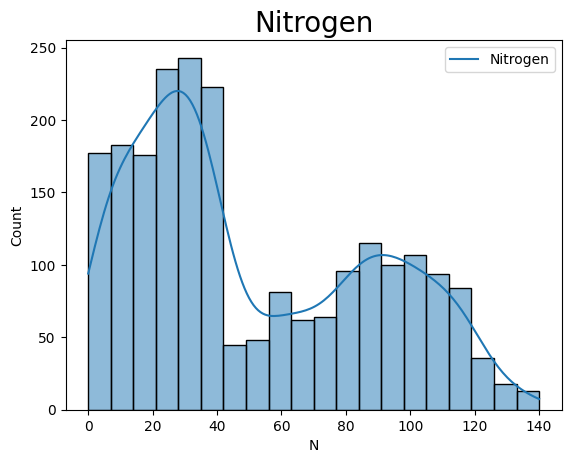

In [54]:
sns.histplot(x=df.N, bins=20, kde=True)
plt.title("Nitrogen", size=20)
plt.legend(['Nitrogen'])

In [ ]:
for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        sns.histplot(x=df[column], bins=20, kde=True)
        plt.title("{Column}", size=20)
        plt.legend(['{Column}'])
    else:
        sns.barplot(x=df[column], bins=20, kde=True)
        plt.title("{Column}", size=20)
        plt.legend(['{Column}'])